In [2]:
import os # it's main function is to provide interacting with operation system
import numpy as np #it is a powerful tool used for numerical computation
import pandas as pd # it is used for the task like data preprocessing manipulation,exploration and facilatiting handling of structured data.


import seaborn as sns  #it is used for high level functions for statistical data visulization

import plotly.express as px # it is used for high level interface for creating interactive and expressive visulation.
# it simply the processes of generating complex plots such as scatter plots,line plots,bar plots

import matplotlib.pyplot as plt # it is commonly used to create static ,interactive and plubication quality visulation , crucial task like data exploration, model evaluation and result presentation

#%matplotlib inline-- #this command ensures that plots generated using matplotlib are displayed directly with the notebook.

import tensorflow as tf # it is the open source machine learrning framework developed by google for building and training varoius types of machine learning
# It provides ecosystem of tools,libraries and resources for tasks as data preprocessing,model building and deployment.


from sklearn.cluster import KMeans
#sklearn.cluster-- it provides implementation of various clustering algorithum such as k-means,DBSCAN and hirerahical clustering which are used to group similar data points together on their feautures .
# K-Means-- It is a popular unsupervised machine learning algorithm used for clustering data point into predefined number of cluster.
from sklearn.preprocessing import StandardScaler
# sklearn.preprocessing-- Is a module in scikit-learn a python library for machine learning.it provide utilizes for preprocessing data before feeding into machine learning algorithums.
# standardScaler--polular library used for standarding by removing the mean and scaling to unit variance .this ensure that mean of each features is 0 and the variance is 1 , which can be important for certain machine learning .

from sklearn.pipeline import Pipeline
#pipeline is a scrikt learn class that allows you to chain multiple processing steps together , such as preprocessing and modelling into a single object . this can be participate useful for streamling the workflow in machine learning .
from sklearn.manifold import TSNE
# it is a technique used for dimensionality reduction and visulization of high dimensional data.
# it amins to map and visualization data points into lower dimensional space, typically 2d and 3d
from sklearn.decomposition import PCA
# PCA is the technique used for dimensionality reduction in machine learning and data analysis . it amin is to tranform high dimensional data into a lower dimenional space while preserving the most important information.
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/drive/MyDrive/AIML MUSIC RECOMMENDATION(FINAL EVALUATION)/data/data.csv")
# reads a csv file located at this location and same with other two also
genre_data = pd.read_csv('/content/drive/MyDrive/AIML MUSIC RECOMMENDATION(FINAL EVALUATION)/data/data_by_genres.csv')
year_data = pd.read_csv("/content/drive/MyDrive/AIML MUSIC RECOMMENDATION(FINAL EVALUATION)/data/data_w_genres.csv")

In [ ]:
print(data.info())
# this will concise the sumary of dataframe ,will give the information about the index, coloumn , non-null values and data type
# non-Null -- this refer to the number of data point in dataset that are not missing or null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
print(genre_data.info())

# will have many genre of songs example--danceability , duration_ms,energy etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [ ]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


**DATA OBSERVATION BY VISULATISATION AND EDA**

In [4]:
data
# this will give an detail explanation on valency, year, acousticness, artist, danceablilty, energy, explit ,id ,key ,liveness,mode ,release data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

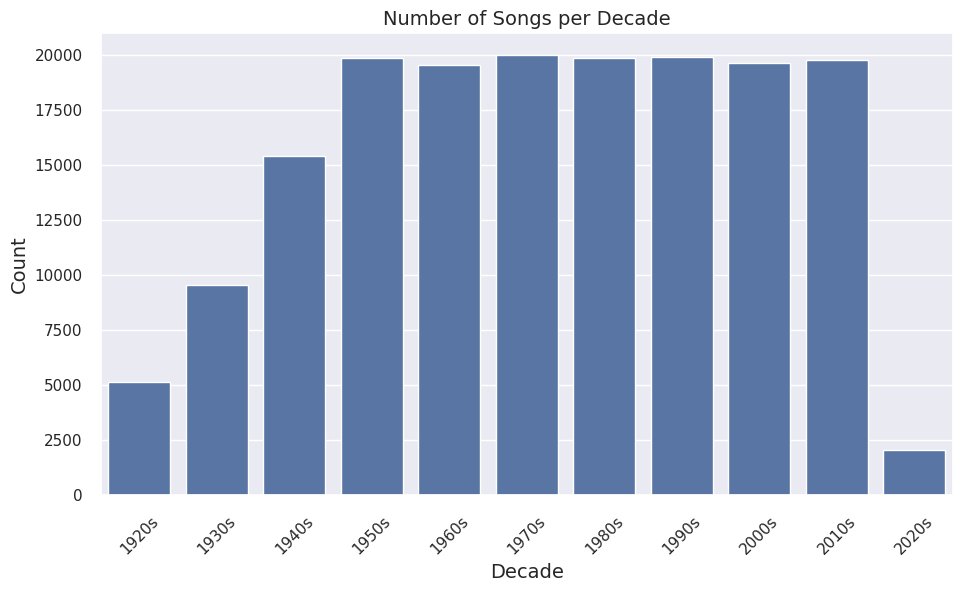

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)
data['decade'] = pd.Categorical(data['decade'])

sns.set(rc={'figure.figsize': (11, 6)})
sns.countplot(x='decade', data=data)
plt.xlabel('Decade', size=14)
plt.ylabel('Count', size=14)
plt.title('Number of Songs per Decade', size=14)
plt.xticks(rotation=45)
plt.show()

#that takes a year as input and returns the decade corresponding to that year.
# it then applies this function to year coloumn in the dataframe 'data' to create a new coloumn decade containing
#the decade information for each song.

#the code uses seaborn to create to count plot showing the number of songs per deacde .
# on y axix it will show count tnhat is number of songs came in that year
# onn x axis it will in which decade that is released


In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()
# The bar graph displays the top 10 music genres by popularity, comparing their levels of valence, energy, danceability, and acousticness, with these attributes grouped by genre for clear side-by-side comparison.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

#The scatter plot visualizes a t-SNE projection of music genres into two dimensions, with points colored by their cluster assignments. Each point represents a genre, and hovering over points reveals the genre name and its coordinates in the projected space. This visualization helps to understand the clustering structure and relationships between different music genres.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.008s...
[t-SNE] Computed neighbors for 2973 samples in 0.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106270
[t-SNE] KL divergence after 1000 iterations: 1.392307


In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=20))])

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [ ]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()
#The scatter plot generated using PCA (Principal Component Analysis) shows a 2D projection of songs, with each point representing a song and colored by its cluster label.

Output hidden; open in https://colab.research.google.com to view.